##### __Predicting Employee Exit using ML__
Employee turnover can be costly and disruptive for companies, so predicting who might leave is really valuable. By analyzing employee data, we can build machine learning models that help flag employees at risk of leaving. In this project, we use Logistic Regression also compare it with Random Forest and Gradient Boosting models. These different methods often capture complex patterns better, potentially improving prediction accuracy and helping companies make smarter retention decisions

##### __Import Required Libraries__

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

##### __Importing the dataset__

In [156]:
df = pd.read_csv('Employee.csv')

##### __Data Description-Shape,summary statistics,NaN values__

The dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors.

Columns include - 

Education: The educational qualifications of employees, including degree, institution, and field of study.

Joining Year: The year each employee joined the company, indicating their length of service.

City: The location or city where each employee is based or works.

Payment Tier: Categorization of employees into different salary tiers.

Age: The age of each employee, providing demographic insights.

Gender: Gender identity of employees, promoting diversity analysis.

Ever Benched: Indicates if an employee has ever been temporarily without assigned work.

Experience in Current Domain: The number of years of experience employees have in their current field.

Leave or Not: a target column

##### __Display the first few rows to peek at the data and the last few rows__

In [157]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [158]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [159]:
df.shape

(4653, 9)

In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


##### __Check for NaN__

In [161]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

##### __Encoding categorical values__

In [162]:
df_encoded = pd.get_dummies(df, drop_first=True)

corr_matrix = df_encoded.corr()

In [163]:
corr_matrix

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705,0.191759,-0.001362,0.141744,-0.020167,-0.012213,0.049353
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638,-0.199632,0.011966,-0.102642,-0.229910,0.235119,0.019207
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126,-0.010192,-0.004029,-0.032461,-0.013273,-0.003866,-0.016135
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504,-0.006584,0.000637,-0.007608,-0.005690,0.008745,0.001408
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000,0.145801,-0.038938,-0.033341,0.206264,-0.220701,0.078438
Education_Masters,0.191759,-0.199632,-0.010192,-0.006584,0.145801,1.000000,-0.096126,0.381977,-0.007299,-0.021561,-0.013930
Education_PHD,-0.001362,0.011966,-0.004029,0.000637,-0.038938,-0.096126,1.000000,0.151214,-0.062189,0.007133,-0.056639
City_New Delhi,0.141744,-0.102642,-0.032461,-0.007608,-0.033341,0.381977,0.151214,1.000000,-0.352096,-0.155877,-0.029246
City_Pune,-0.020167,-0.229910,-0.013273,-0.005690,0.206264,-0.007299,-0.062189,-0.352096,1.000000,-0.083685,0.007534
Gender_Male,-0.012213,0.235119,-0.003866,0.008745,-0.220701,-0.021561,0.007133,-0.155877,-0.083685,1.000000,0.019653


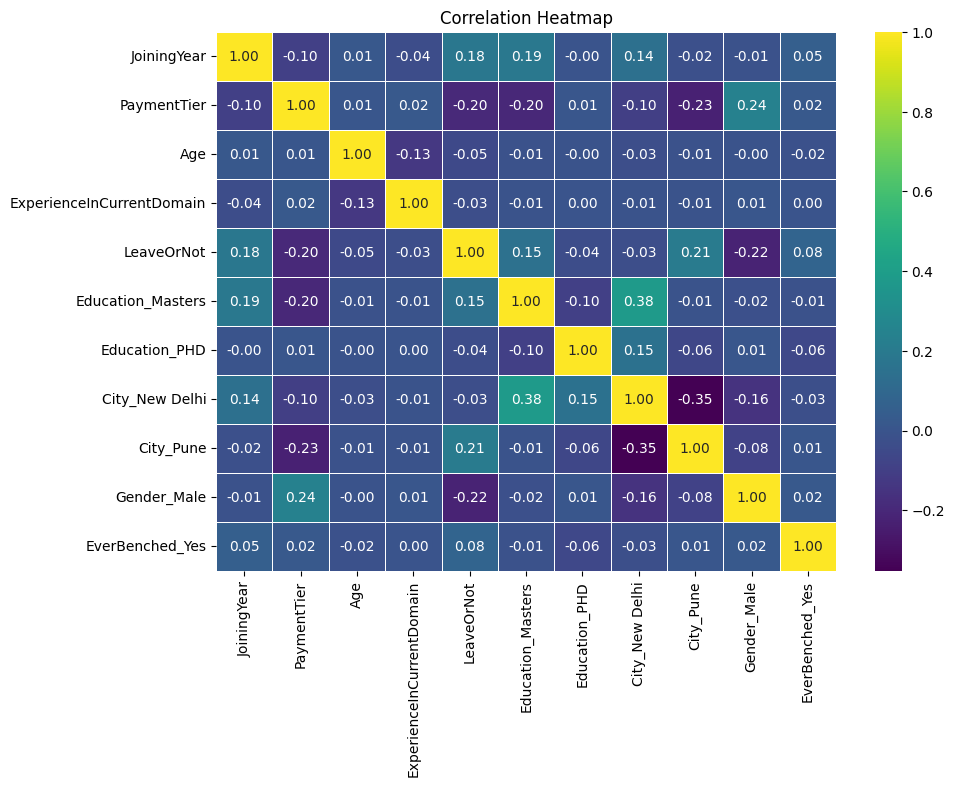

In [164]:
# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

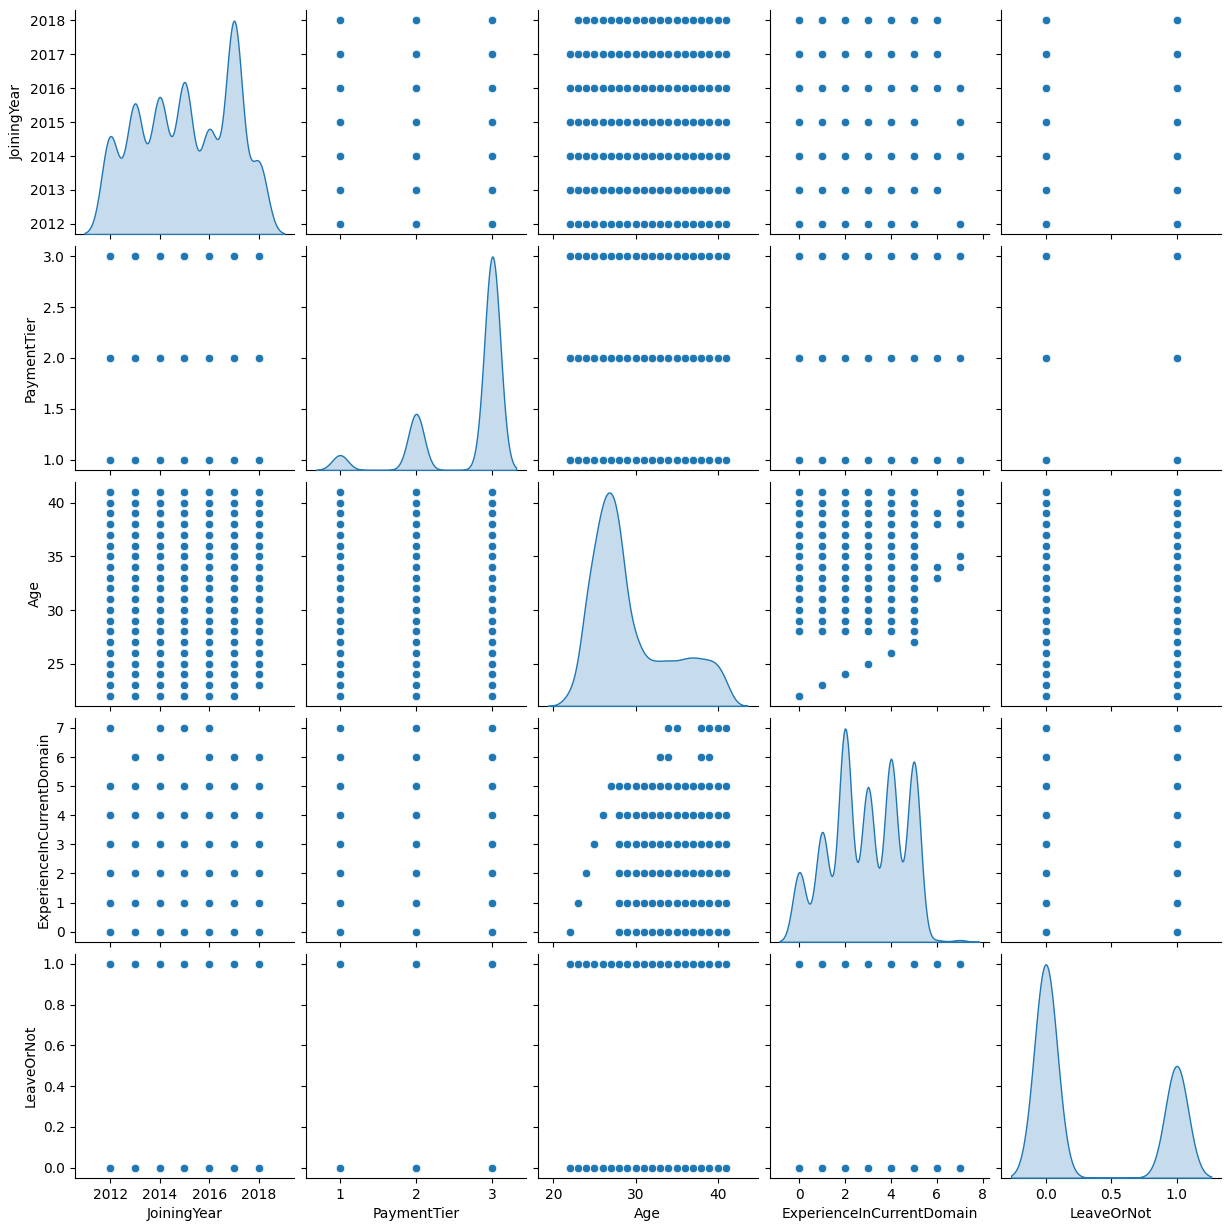

In [165]:
sns.pairplot(df, diag_kind = "kde")

##### __Data Analysis__
There's no strong collinearity. Most features are only weakly related to each other and to the target. The plots visually shows the absence of  correlations. Thus, training models on all the features.

##### __Model Training and Evaluation Metrics__
Three classification algorithms, Logistic Regression, Random Forest, and Gradient Boosting Classifier were trained and evaluated using a 5-fold cross-validation approach. The following evaluation metrics were computed for each model:

Accuracy

F1 Score

Precision

Recall

AUC-ROC curve

Confusion Matrix

Classification Report

This ensures robust performance measurement while mitigating overfitting risks through cross-validation.

In [166]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

In [167]:
target = 'Attrition'

#Encoding numerical and categorical data
categorical = X.select_dtypes(include=['object']).columns.tolist()
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# Splitting data for training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

##### __Logistic Regression__

Logistic Regression
Accuracy: 0.7449856733524355
Precision: 0.6925465838509317
Recall: 0.46458333333333335
f1-score: 0.5561097256857855
Cross Validation
 0.7291976477905628
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       916
           1       0.69      0.46      0.56       480

    accuracy                           0.74      1396
   macro avg       0.73      0.68      0.69      1396
weighted avg       0.74      0.74      0.73      1396

Confusion Matrix:
 [[817  99]
 [257 223]]


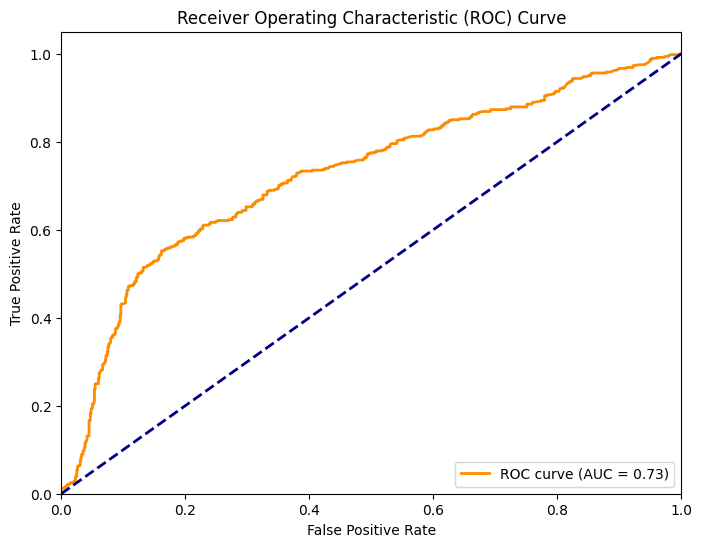

In [168]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)
y_proba = model.predict_proba(X_test_preprocessed)[:, 1]

print('Logistic Regression')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("f1-score:",f1_score(y_test, y_pred))
cr = cross_val_score(model,X_train_preprocessed, y_train,cv=5)
print("Cross Validation\n",np.mean(cr))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



##### __Random Forest__

Random Forest Classifier
Accuracy: 0.8524355300859598
Precision: 0.8530927835051546
Recall: 0.6895833333333333
f1-score: 0.7626728110599078
Cross Validation
 0.8455627491447796
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       916
           1       0.85      0.69      0.76       480

    accuracy                           0.85      1396
   macro avg       0.85      0.81      0.83      1396
weighted avg       0.85      0.85      0.85      1396

Confusion Matrix:
 [[859  57]
 [149 331]]


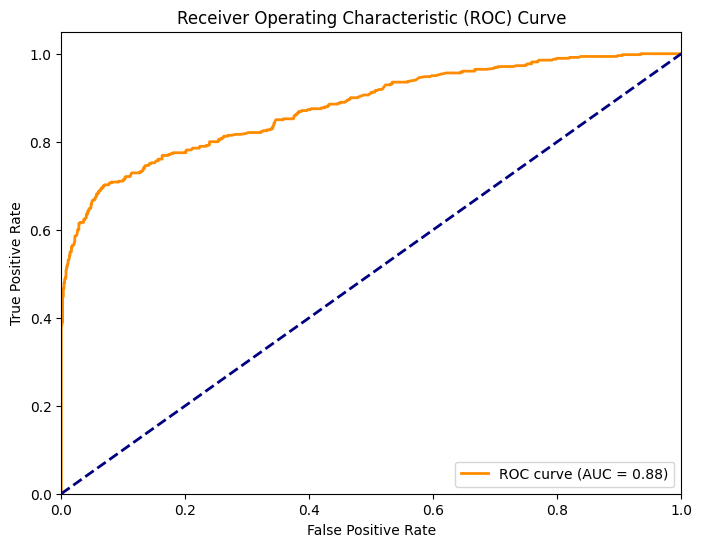

In [169]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_preprocessed, y_train)

y_pred = rf.predict(X_test_preprocessed)
y_proba = rf.predict_proba(X_test_preprocessed)[:, 1]  # Probabilities for ROC curve

print('Random Forest Classifier')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("f1-score:",f1_score(y_test, y_pred))
cr = cross_val_score(rf,X_train_preprocessed, y_train,cv=5)
print("Cross Validation\n",np.mean(cr))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



##### __Gradient Boosting__

Gradient Boosting Classifier
Accuracy: 0.836676217765043
Precision: 0.8351063829787234
Recall: 0.6541666666666667
F1-score: 0.7336448598130841
Cross Validation
: 0.8434140962935739
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       916
           1       0.84      0.65      0.73       480

    accuracy                           0.84      1396
   macro avg       0.84      0.79      0.81      1396
weighted avg       0.84      0.84      0.83      1396

Confusion Matrix:
 [[854  62]
 [166 314]]


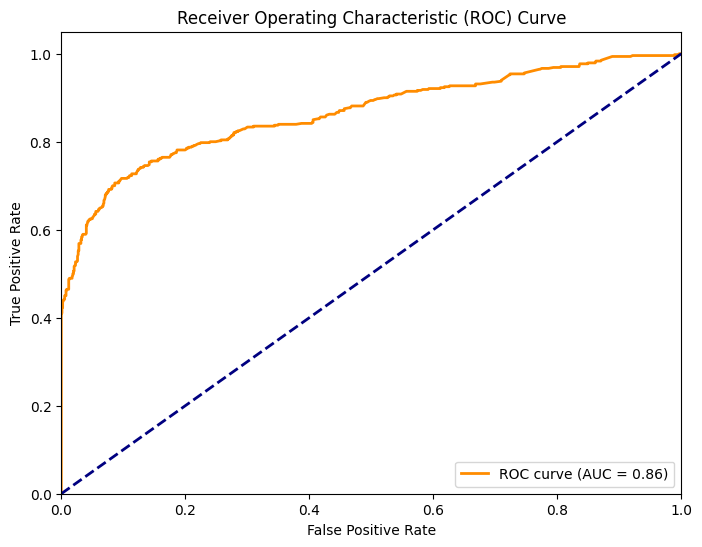

In [170]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train_preprocessed, y_train)

y_pred = gb_clf.predict(X_test_preprocessed)

y_proba = gb_clf.predict_proba(X_test_preprocessed)[:, 1]  

print('Gradient Boosting Classifier')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
cr = cross_val_score(gb_clf, X_train_preprocessed, y_train, cv=5)
print("Cross Validation\n:", np.mean(cr))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)  # Use y_proba here
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### __Comparison between the 3 models__:

Random Forest outperforms both Gradient Boosting and Logistic Regression in accuracy, F1-score, and AUC-ROC, making it the best choice for this employee attrition dataset.

Gradient Boosting is a close second, with slightly lower recall and F1-score.

Logistic Regression lags behind. 

##### __Limitations__
Relatively small data set focusing a specific demography and region.

Limited features available in dataset.

##### __Ethical Concerns__
How employee data is stored and used could raise concerns.

This can cause bias among recruiters.

##### __Next Steps__
A wider data set may help optimize this further. 

More features could be included.

Other models to be explored. 